# Exercício: Solucionando o problema das 8 rainhas
## Solução 1: força bruta!

Varrendo cada linha do tabuleiro e colocando uma rainha por coluna, enquanto checamos a cada passo que duas rainhas não estão na linha de ataque da outra. 

Dessa forma, a solução avaliará todas as combinações possíveis das oito rainhas no tabuleiro de xadrez e rejeitará os estados inválidos. Quantas combinações de 8 rainhas em um tabuleiro de 64 células são possíveis?

A fórmula de combinações é dada por:

$C(n,k) = \frac{n!}{k!\cdot(n-k)!}$

Considerando um tabuleiro de 8 x 8, teríamos:

$C(64,8) = \frac{64!}{8!\cdot(64-8)!} = 4.426.165.368$ soluções possíveis a serem avaliadas. 

Considerando que este é um problema que pode ser usado para representar outros 
[problemas](https://pdfs.semanticscholar.org/79d2/fa13d4a5cfc02ff6936b6083bb620e4e0ce1.pdf) (reais, e.g., VLSI design) 
que eventualmente pode ter dimensões muito superiores às de um tabuleiro de xadrez, vale a pena analisar como se dá o 
crescimento deste problema em termos da entrada.

### Questão 1
Gere um gráfico (utilize o matplotlib) que demonstre a taxa de crescimento da quantidade de soluções possíveis em termos do tamanho do tabuleiro, conforme apresentado acima.

[(1, 1.0), (2, 6.0), (3, 84.0), (4, 1820.0), (5, 53130.0), (6, 1947792.0), (7, 85900584.0), (8, 4426165368.0)]


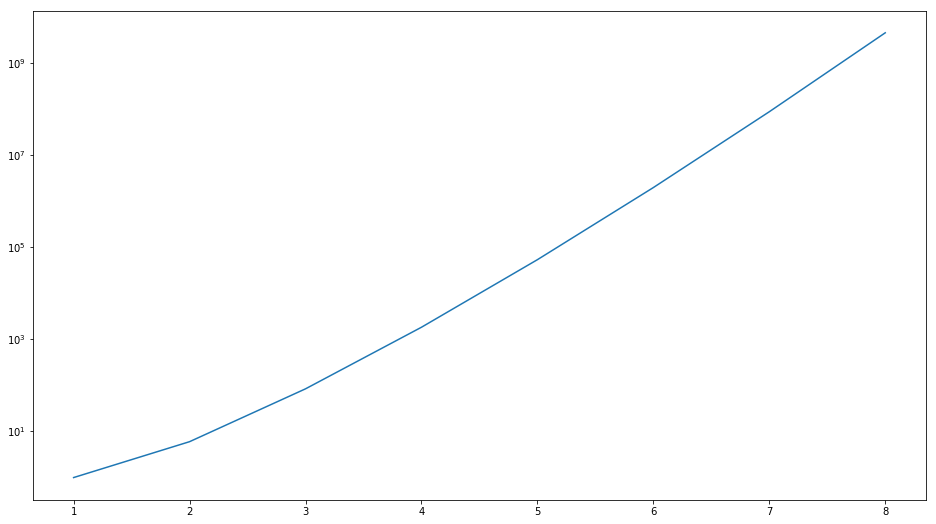

In [1]:
from matplotlib import pyplot
from numpy import arange
from statistics import mean

def combination(n, k):
  from math import factorial
  
  return ( factorial(n) )/( factorial(k) * factorial(n-k) )

def myCombination(k):
  return combination((k*k), k)


fig = pyplot.gcf()
fig.set_size_inches(16, 9)

x = [i for i in range(1,9)]
y = [myCombination(i) for i in x]

print( list( zip(x, y) ) )
pyplot.plot(x, y)
pyplot.yscale('log')

pyplot.show()

## Modelando o problema em Python

In [0]:
board_size = 8

In [3]:
"""The n queens puzzle"""
class NQueens:
    def __init__(self, size):
        # Store the puzzle (problem) size and the number of valid solutions
        self.size = size
        self.solutions = 0
        self.oldGames = []

    def solve(self):
        return []

    def show(self, solution=None):
        """Show the full NxN board"""
        for row in range(self.size):
          line = ""
          for column in range(self.size):
            if solution and solution[column] == row:
              line += "Q "
            elif((row+column) % 2 == 0):
              line += "■ "
            else:
              line += "□ "
          print(line)
        print("\n")
       
# Criando uma instância do problema
board = NQueens(8)
l = [3, 5, 7, 1, 6, 0, 2, 4]
l.reverse()
print("Board Exemple:", l)
board.show(l)

Board Exemple: [4, 2, 0, 6, 1, 7, 5, 3]
■ □ Q □ ■ □ ■ □ 
□ ■ □ ■ Q ■ □ ■ 
■ Q ■ □ ■ □ ■ □ 
□ ■ □ ■ □ ■ □ Q 
Q □ ■ □ ■ □ ■ □ 
□ ■ □ ■ □ ■ Q ■ 
■ □ ■ Q ■ □ ■ □ 
□ ■ □ ■ □ Q □ ■ 




### Questão 2
Implemente a seguinte formulação:

- estados: qualquer disposição com n (n ≤ 8) rainhas
- operadores: adicionar uma rainha a qualquer quadrado
- Verificar se a solução é válida ao final da 'alocação'
- 64x63x...x57 = 3x1014 possibilidades

In [4]:
class NQueens2(NQueens):
  def __init__(self, size):
    super().__init__(size)
    self.startOptions()
  
  def startOptions(self):
    self.options = [x for x in range(self.size)]
  
  def isSolve(self, solution):
    for i in range(1, len(solution)):
      for j in range(0, i):
        if(not self.isPosition(solution[i], solution[j], (i-j) )):
          return False        
    return True
  
  def isPosition(self, first_column, second_column, diagonal_distance):
    return not (first_column == second_column or \
           first_column + ( -diagonal_distance ) == second_column or \
           first_column + (diagonal_distance) == second_column)
  
  def selectOption(self):
    from random import randint
    rand_limit = len(self.options)-1
    option = self.options[ randint(0, rand_limit) ]
    
    return option
  
  def getGame(self):
    while 1:
      self.game = []
        
      for i in range(self.size):
        self.game.append( self.selectOption() )

      if(self.game in self.oldGames):
        continue
        
      self.oldGames.append(self.game)
      return self.game
  
  def attemptPrint(self):
    from sys import stdout
    stdout.write("\r" + "Attempts: %d" % (self.count))
    
  def searchSolucion(self):
    self.count = 0
    while 1:
      self.game = self.getGame()
      self.count += 1

      if(self.count % 1000 == 0):
        self.attemptPrint()

      if(self.isSolve(self.game)):
        print("\nA Solution", self.game, "trial numbers", len(self.oldGames))
        self.show(self.game)
        break

board2 = NQueens2(board_size)
board2.searchSolucion()

Attempts: 62000
A Solution [1, 3, 5, 7, 2, 0, 6, 4] trial numbers 62701
■ □ ■ □ ■ Q ■ □ 
Q ■ □ ■ □ ■ □ ■ 
■ □ ■ □ Q □ ■ □ 
□ Q □ ■ □ ■ □ ■ 
■ □ ■ □ ■ □ ■ Q 
□ ■ Q ■ □ ■ □ ■ 
■ □ ■ □ ■ □ Q □ 
□ ■ □ Q □ ■ □ ■ 




### Questão 3
Implemente a seguinte formulação:

- estados: disposição com n (n ≤ 8) rainhas sem ataque mútuo (teste gradual)
- operadores: adicionar uma rainha na coluna vazia mais à esquerda em que não possa ser atacada
- 2057 possibilidades (podendo ficar sem opções de escolha dependendo das operações anteriores)

In [5]:
class NQueens3(NQueens2):
  def selectOption(self):
    option = super().selectOption()
    self.options.remove(option)
    
    return option
  
  def existsOptions(self):
    return len(self.options) <= 0
    
  def putQueen(self, board):
    self.startOptions()
    self.options = self.removeList(self.options, board)
    
    while 1:
      if( self.existsOptions() ):
        board = None
        break
      board.append( self.selectOption() )
      if( self.isValidLastQueen(board) ):
        break
      board.pop(-1)
      
    return board
  
  def isValidLastQueen(self, board):
    target_position = len(board)-1
    for i in range(target_position):
      if(not self.isPosition( board[target_position], board[i], (target_position - i) )):
        return False
    return True
      
  def removeList(self, target_list, remover_list):
    remover_list = list(set(remover_list))
    if(remover_list):
      for i in remover_list:
        target_list.remove(i)
        
    return target_list
    
  def searchSolucion(self):
    self.count = 0
    self.game = None
    while 1:
      if(self.game == None):
        self.game = []
        self.count += 1
        
      self.game = self.putQueen(self.game)
      
      if(self.game and len(self.game) == self.size):
        print("A Solution", self.game, "trial numbers", self.count)
        self.show(self.game)
        break

        
board3 = NQueens3(board_size)
board3.searchSolucion()

A Solution [2, 4, 1, 7, 5, 3, 6, 0] trial numbers 14
■ □ ■ □ ■ □ ■ Q 
□ ■ Q ■ □ ■ □ ■ 
Q □ ■ □ ■ □ ■ □ 
□ ■ □ ■ □ Q □ ■ 
■ Q ■ □ ■ □ ■ □ 
□ ■ □ ■ Q ■ □ ■ 
■ □ ■ □ ■ □ Q □ 
□ ■ □ Q □ ■ □ ■ 




### Questão 4
Implemente a seguinte formulação:
- estados: disposição com 8 rainhas, uma em cada coluna
- operadores: mover uma rainha atacada para outra casa na mesma coluna

In [6]:
class NQueens4(NQueens3):
  def __init__(self, size):
    super().__init__(size)
    self.startGame()
    
  def startGame(self):
    self.game = [0]*self.size
    
  def addCount(self, first_position, last_position):
    if(first_position != last_position):
      self.count += 1
    
  def testLastQueen(self, partial_board):
    self.startOptions()
    self.options = self.removeList(self.options, partial_board)
    old_partial_board = partial_board[:]
    
    while 1:
      if( self.isValidLastQueen(partial_board) ):
        break
      elif( self.existsOptions() ):
        break
        
      partial_board[-1] = self.selectOption()
    
    self.addCount(old_partial_board, partial_board)
      
    return partial_board
      
  def searchSolucion(self):
    from time import sleep
    from IPython.display import clear_output
    self.count = 0
    while 1:
      self.startOptions()
      for i in range(self.size):
        if(i == 0):
          self.first_position = self.game[i]
          self.game[i] = self.selectOption()
          self.addCount(self.first_position, self.game[i])
        else:
          self.game = self.testLastQueen(self.game[:i+1]) + self.game[i+1:]
        clear_output()
        self.show(self.game)
        #sleep(1.5)
        
      if(self.isSolve(self.game)):
        clear_output()
        print("A Solution", self.game, "Move numbers:", self.count)
        self.show(self.game)
        break
        

board4 = NQueens4(board_size)
board4.searchSolucion()

A Solution [4, 1, 3, 6, 2, 7, 5, 0] Move numbers: 92
■ □ ■ □ ■ □ ■ Q 
□ Q □ ■ □ ■ □ ■ 
■ □ ■ □ Q □ ■ □ 
□ ■ Q ■ □ ■ □ ■ 
Q □ ■ □ ■ □ ■ □ 
□ ■ □ ■ □ ■ Q ■ 
■ □ ■ Q ■ □ ■ □ 
□ ■ □ ■ □ Q □ ■ 


